In [ ]:
# Import packages
import pandas as pd
import geopandas as gpd
import numpy as np
import rdrobust as rd
import matplotlib.pyplot as plt

# Load data
sales_df = pd.read_csv("sales_values.csv") # sales values data
oa_gdf = gpd.read_file("London_OA_2016.shp") # opportunity areas shapefile

# Filter data for year 2022 and convert to geodataframe
sales_df = sales_df[sales_df["Year"] == 2022]
sales_gdf = gpd.GeoDataFrame(sales_df, geometry=gpd.points_from_xy(sales_df["Longitude"], sales_df["Latitude"]))

# Spatial join sales data with opportunity areas data
sales_gdf = gpd.sjoin(sales_gdf, oa_gdf, how="left", op="within")

# Define treatment indicator variable
sales_gdf["treatment"] = sales_gdf["index_right"].notnull().astype(int)

# Define running variable as distance to nearest opportunity area boundary
sales_gdf["distance"] = sales_gdf.geometry.apply(lambda x: oa_gdf.boundary.distance(x).min())

# Choose bandwidth using rdrobust.bandwidth
bw_result = rd.rdrobust.bandwidth(sales_gdf["Sales_Value"], sales_gdf["distance"], sales_gdf["treatment"], c=0)
bw = bw_result.bw

# Filter data for observations within bandwidth
sales_gdf = sales_gdf[sales_gdf["distance"].abs() <= bw]

# Estimate effect using rdrobust
rd_result = rd.rdrobust(sales_gdf["Sales_Value"], sales_gdf["distance"], sales_gdf["treatment"], c=0)

# Print results
print(rd_result.summary)

# Plot results
rd.plot(rd_result)
plt.show()

In [ ]:
pip install rdrobust

In [4]:
# Import packages
import pandas as pd
import geopandas as gpd
import numpy as np
import rdrobust as rd
import matplotlib.pyplot as plt

In [5]:
openuprncsv = pd.read_csv("data/osopenuprn_202302.csv")
openuprncsv.head()

,UPRN,X_COORDINATE,Y_COORDINATE,LATITUDE,LONGITUDE
0,1,358260.66,172796.5,51.452601,-2.602075
1,26,352967.00,181077.0,51.526633,-2.679361
2,27,352967.00,181077.0,51.526633,-2.679361
3,30,354800.00,180469.0,51.521317,-2.652862
4,31,354796.00,180460.0,51.521236,-2.652918


In [6]:
openuprn2 = gpd.GeoDataFrame(openuprncsv, geometry = gpd.points_from_xy(openuprncsv['X_COORDINATE'], openuprncsv['Y_COORDINATE']), crs = 'EPSG:27700')
openuprn2.head()

,UPRN,X_COORDINATE,Y_COORDINATE,LATITUDE,LONGITUDE,geometry
0,1,358260.66,172796.5,51.452601,-2.602075,POINT (358260.660 172796.500)
1,26,352967.00,181077.0,51.526633,-2.679361,POINT (352967.000 181077.000)
2,27,352967.00,181077.0,51.526633,-2.679361,POINT (352967.000 181077.000)
3,30,354800.00,180469.0,51.521317,-2.652862,POINT (354800.000 180469.000)
4,31,354796.00,180460.0,51.521236,-2.652918,POINT (354796.000 180460.000)


In [7]:
uprn = pd.read_csv("data/ppdiduprnusrnubdc.csv")
uprn.head()

,transactionid,uprn,usrn
0,{DD204FA6-B333-4A06-9E31-7ACABE162EB7},30,4549897
1,{B26F0F8D-4C7A-4DBF-B10A-3336830BF462},31,4549897
2,{241A4A53-DD8C-706B-E050-A8C06205638B},63,4582546
3,{85866A64-627D-143F-E053-6B04A8C06A15},97,4527985
4,{BE61D947-ED06-482E-8274-8B84912C15CB},103,4527985


In [8]:
camden_price = pd.read_csv("data/hpm_la_2022/Camden_link_13082022.csv")
camden_price.head()

,priceper,year,dateoftransfer,propertytype,duration,price,postcode,lad21cd,transactionid,id,tfarea,numberrooms,classt,CURRENT_ENERGY_EFFICIENCY,POTENTIAL_ENERGY_EFFICIENCY,CONSTRUCTION_AGE_BAND
0,4453.125000,1999,1999-03-08,F,L,285000,EC1M 3HA,E09000007,{874382CA-FB65-4783-A7E9-4808A66E2193},19077801,64.0,4.0,11,80,80,England and Wales: 1983-1990
1,8817.204301,2017,2017-04-12,F,L,820000,EC1M 3HA,E09000007,{4E95D757-A6E1-EDA1-E050-A8C0630539E2},19076728,93.0,3.0,12,71,73,England and Wales: 1996-2002
2,5000.000000,2006,2006-07-10,F,L,440000,EC1M 3HA,E09000007,{1836572E-C388-422B-BA88-97C90D3AF44F},19000267,88.0,3.0,11,79,81,England and Wales: 1996-2002
3,4901.960784,2002,2002-05-01,F,L,550000,EC1M 3HA,E09000007,{6D65FA9D-1AD1-4E1C-9A5D-209A486481F8},19057980,112.2,4.0,12,47,52,England and Wales: 1991-1995
4,11144.578313,2018,2018-09-11,F,L,555000,EC1M 3HA,E09000007,{773788C2-EF2A-2CE4-E053-6C04A8C05E57},19061398,49.8,2.0,11,76,77,England and Wales: 1996-2002


In [9]:
camden_merge = pd.merge(camden_price, uprn, how = 'left', left_on = "transactionid", right_on = "transactionid").dropna()
camden_merge[['uprn','usrn']] = camden_merge[['uprn','usrn']].astype(int)

camden_merge['uprn'].head()

0    5129471
1    5112813
2    5112827
3    5112844
4    5112812
Name: uprn, dtype: int64

In [10]:
camden_merge = pd.merge(camden_merge, openuprn2, how = 'left', left_on = 'uprn', right_on = 'UPRN')
camden_merge.head()

,priceper,year,dateoftransfer,propertytype,duration,price,postcode,lad21cd,transactionid,id,...,POTENTIAL_ENERGY_EFFICIENCY,CONSTRUCTION_AGE_BAND,uprn,usrn,UPRN,X_COORDINATE,Y_COORDINATE,LATITUDE,LONGITUDE,geometry
0,4453.125000,1999,1999-03-08,F,L,285000,EC1M 3HA,E09000007,{874382CA-FB65-4783-A7E9-4808A66E2193},19077801,...,80,England and Wales: 1983-1990,5129471,20401051,5129471,531511.0,181768.0,51.519532,-0.105911,POINT (531511.000 181768.000)
1,8817.204301,2017,2017-04-12,F,L,820000,EC1M 3HA,E09000007,{4E95D757-A6E1-EDA1-E050-A8C0630539E2},19076728,...,73,England and Wales: 1996-2002,5112813,20401051,5112813,531511.0,181768.0,51.519532,-0.105911,POINT (531511.000 181768.000)
2,5000.000000,2006,2006-07-10,F,L,440000,EC1M 3HA,E09000007,{1836572E-C388-422B-BA88-97C90D3AF44F},19000267,...,81,England and Wales: 1996-2002,5112827,20401051,5112827,531511.0,181768.0,51.519532,-0.105911,POINT (531511.000 181768.000)
3,4901.960784,2002,2002-05-01,F,L,550000,EC1M 3HA,E09000007,{6D65FA9D-1AD1-4E1C-9A5D-209A486481F8},19057980,...,52,England and Wales: 1991-1995,5112844,20401051,5112844,531511.0,181768.0,51.519532,-0.105911,POINT (531511.000 181768.000)
4,11144.578313,2018,2018-09-11,F,L,555000,EC1M 3HA,E09000007,{773788C2-EF2A-2CE4-E053-6C04A8C05E57},19061398,...,77,England and Wales: 1996-2002,5112812,20401051,5112812,531511.0,181768.0,51.519532,-0.105911,POINT (531511.000 181768.000)


In [127]:
camden_merge = camden_merge.set_geometry('geometry')


In [163]:
sales_gdf = camden_merge.copy()
sales_gdf.head()

,priceper,year,dateoftransfer,propertytype,duration,price,postcode,lad21cd,transactionid,id,...,POTENTIAL_ENERGY_EFFICIENCY,CONSTRUCTION_AGE_BAND,uprn,usrn,UPRN,X_COORDINATE,Y_COORDINATE,LATITUDE,LONGITUDE,geometry
0,4453.125000,1999,1999-03-08,F,L,285000,EC1M 3HA,E09000007,{874382CA-FB65-4783-A7E9-4808A66E2193},19077801,...,80,England and Wales: 1983-1990,5129471,20401051,5129471,531511.0,181768.0,51.519532,-0.105911,POINT (531511.000 181768.000)
1,8817.204301,2017,2017-04-12,F,L,820000,EC1M 3HA,E09000007,{4E95D757-A6E1-EDA1-E050-A8C0630539E2},19076728,...,73,England and Wales: 1996-2002,5112813,20401051,5112813,531511.0,181768.0,51.519532,-0.105911,POINT (531511.000 181768.000)
2,5000.000000,2006,2006-07-10,F,L,440000,EC1M 3HA,E09000007,{1836572E-C388-422B-BA88-97C90D3AF44F},19000267,...,81,England and Wales: 1996-2002,5112827,20401051,5112827,531511.0,181768.0,51.519532,-0.105911,POINT (531511.000 181768.000)
3,4901.960784,2002,2002-05-01,F,L,550000,EC1M 3HA,E09000007,{6D65FA9D-1AD1-4E1C-9A5D-209A486481F8},19057980,...,52,England and Wales: 1991-1995,5112844,20401051,5112844,531511.0,181768.0,51.519532,-0.105911,POINT (531511.000 181768.000)
4,11144.578313,2018,2018-09-11,F,L,555000,EC1M 3HA,E09000007,{773788C2-EF2A-2CE4-E053-6C04A8C05E57},19061398,...,77,England and Wales: 1996-2002,5112812,20401051,5112812,531511.0,181768.0,51.519532,-0.105911,POINT (531511.000 181768.000)


In [129]:
sales_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 47680 entries, 0 to 47679
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   priceper                     47680 non-null  float64 
 1   year                         47680 non-null  int64   
 2   dateoftransfer               47680 non-null  object  
 3   propertytype                 47680 non-null  object  
 4   duration                     47680 non-null  object  
 5   price                        47680 non-null  int64   
 6   postcode                     47680 non-null  object  
 7   lad21cd                      47680 non-null  object  
 8   transactionid                47680 non-null  object  
 9   id                           47680 non-null  int64   
 10  tfarea                       47680 non-null  float64 
 11  numberrooms                  47680 non-null  float64 
 12  classt                       47680 non-null  int64  

In [164]:
oa_gdf = gpd.read_file("data/Opportunity_Areas.gpkg", crs = 'EPSG:27700')
oa_gdf.head()

,address,borough,boroughdesignation,classification,designation,easting,extrainfo1,extrainfo2,extrainfo3,firstaddeddate,...,objectid,planning_authority,removeddate,sitename,sitereference,source,status,uprn,runtime,geometry
0,,Southwark,,,Opportunity Area,532405,https://geo.southwark.gov.uk/connect/analyst/m...,https://www.london.gov.uk/what-we-do/planning/...,Adopted date:2015,None,...,1,,None,"Bankside, Borough and London Bridge",21,Neighbourhood Plan,Adopted,None,09/18/2019,"MULTIPOLYGON (((531313.964 180682.924, 531335...."
1,,Southwark,,,Opportunity Area,532078,https://www.southwark.gov.uk/planning-and-buil...,https://www.london.gov.uk/what-we-do/planning/...,Adopted date:2015,None,...,2,,None,Elephant and Castle,11,SPD / OAPF,Adopted,None,09/18/2019,"MULTIPOLYGON (((532338.212 177675.806, 532340...."
2,,Croydon,,,Opportunity Area,532398,https://www.croydon.gov.uk/sites/default/files...,https://www.london.gov.uk/what-we-do/planning/...,Adopted date:20130101,None,...,3,,None,Croydon,8,OAPF,Adopted,None,09/18/2019,"MULTIPOLYGON (((532022.150 165038.555, 532021...."
3,,Camden,,,Opportunity Area,529249,https://www.eustonareaplan.info/wp-content/upl...,https://www.london.gov.uk/what-we-do/planning/...,Adopted date:20150101,None,...,4,,None,Euston,12,Area Plan,Adopted,None,09/18/2019,"MULTIPOLYGON (((528631.262 183519.750, 528678...."
4,,Hammersmith and Fulham,,,Opportunity Area,523244,https://www.lbhf.gov.uk/planning/regeneration-...,https://www.london.gov.uk/what-we-do/planning/...,Adopted date:20180201,None,...,5,,None,White City,37,OAPF,Adopted,None,09/18/2019,"MULTIPOLYGON (((523154.297 180016.182, 523148...."


<AxesSubplot:>

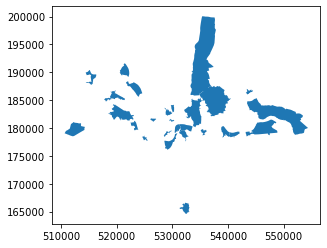

In [144]:
oa_gdf.plot()

<AxesSubplot:>

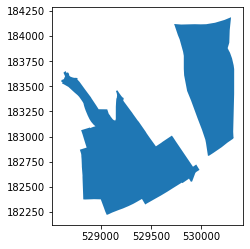

In [149]:
oa_gdf = oa_gdf[oa_gdf['borough'] == "Camden"]
oa_gdf.plot()

In [165]:
# Filter data for year 2022 and convert to geodataframe
sales_gdf = sales_gdf[sales_gdf["year"] > 2010]
sales_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 15831 entries, 1 to 47671
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   priceper                     15831 non-null  float64 
 1   year                         15831 non-null  int64   
 2   dateoftransfer               15831 non-null  object  
 3   propertytype                 15831 non-null  object  
 4   duration                     15831 non-null  object  
 5   price                        15831 non-null  int64   
 6   postcode                     15831 non-null  object  
 7   lad21cd                      15831 non-null  object  
 8   transactionid                15831 non-null  object  
 9   id                           15831 non-null  int64   
 10  tfarea                       15831 non-null  float64 
 11  numberrooms                  15831 non-null  float64 
 12  classt                       15831 non-null  int64  

<AxesSubplot:>

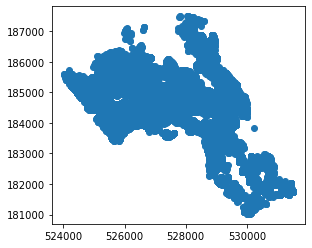

In [152]:
sales_gdf.plot()

<AxesSubplot:>

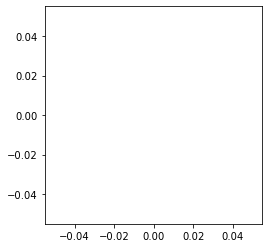

In [142]:
oa_gdf.plot()

In [166]:
# # Filter data for year 2022 and convert to geodataframe
#sales_gdf = sales_gdf[sales_gdf["year"] > 2015]

# # Spatial join sales data with opportunity areas data
sales_gdf = gpd.sjoin(sales_gdf, oa_gdf, how="left", op="within", lsuffix="sales", rsuffix="oa")

# # Define treatment indicator variable
sales_gdf["treatment"] = sales_gdf["index_oa"].notnull().astype(int)

# # Define running variable as distance to nearest opportunity area boundary
sales_gdf["distance"] = sales_gdf.geometry.apply(lambda x: -oa_gdf.boundary.distance(x).min() if x.within(oa_gdf.boundary) else oa_gdf.boundary.distance(x).min())

/opt/conda/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
/tmp/ipykernel_1515/2091857512.py:5: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:27700
Right CRS: PROJCS["unnamed",GEOGCS["Airy 1830",DATUM["unknown ...



AttributeError: 'GeoSeries' object has no attribute '_geom'

Text(0.5, 1.0, 'Price per square metre by distance from OA boundary')

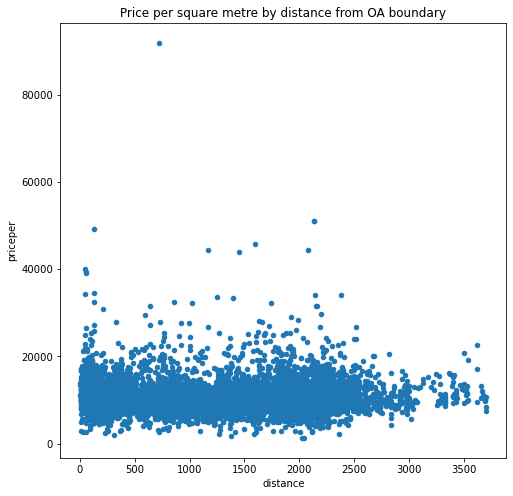

In [162]:
plt.figure(figsize=(8,8))
ax = plt.subplot(1,1,1)
sales_gdf.plot.scatter(x="distance", y="priceper", ax=ax)
plt.title("Price per square metre by distance from OA boundary")


In [153]:
# Spatial join sales data with opportunity areas data
sales_gdf = gpd.sjoin(sales_gdf, oa_gdf, how="left", op="within", lsuffix="sales", rsuffix="oa")
sales_gdf.info()

/opt/conda/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
/tmp/ipykernel_1515/1977583316.py:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:27700
Right CRS: PROJCS["unnamed",GEOGCS["Airy 1830",DATUM["unknown ...



<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 15831 entries, 1 to 47671
Data columns (total 49 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   priceper                     15831 non-null  float64 
 1   year                         15831 non-null  int64   
 2   dateoftransfer               15831 non-null  object  
 3   propertytype                 15831 non-null  object  
 4   duration                     15831 non-null  object  
 5   price                        15831 non-null  int64   
 6   postcode                     15831 non-null  object  
 7   lad21cd                      15831 non-null  object  
 8   transactionid                15831 non-null  object  
 9   id                           15831 non-null  int64   
 10  tfarea                       15831 non-null  float64 
 11  numberrooms                  15831 non-null  float64 
 12  classt                       15831 non-null  int64  

In [154]:
import spreg as sp

# Load data

# # Filter data for year 2022 and convert to geodataframe
# sales_gdf = sales_gdf[sales_gdf["year"] > 2010]

# # Spatial join sales data with opportunity areas data
# sales_gdf = gpd.sjoin(sales_gdf, oa_gdf, how="left", op="within", lsuffix="sales", rsuffix="oa")

# Define treatment indicator variable
sales_gdf["treatment"] = sales_gdf["index_oa"].notnull().astype(int)

# Define running variable as distance to nearest opportunity area boundary
sales_gdf["distance"] = sales_gdf.geometry.apply(lambda x: oa_gdf.boundary.distance(x).min())

# Choose bandwidth using np.percentile
bw = np.percentile(sales_gdf["distance"], 10) # 10th percentile of distance as bandwidth

# Filter data for observations within bandwidth
sales_gdf = sales_gdf[sales_gdf["distance"].abs() <= bw]

# Define outcome variable as log of sales value
#sales_gdf["log_sales_value"] = np.log(sales_gdf["priceper"])

# Define explanatory variables as treatment indicator and distance
X = sales_gdf[["treatment", "distance"]].values


# Estimate spatial lag model using spreg.ML_Lag
model = sp.OLS(y=sales_gdf["priceper"].to_numpy()[:, None], x = sales_gdf["numberrooms"].to_numpy()[:, None])

# Print results
print(model.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :     dep_var                Number of Observations:        1593
Mean dependent var  :   9824.6134                Number of Variables   :           2
S.D. dependent var  :   4610.3526                Degrees of Freedom    :        1591
R-squared           :      0.0410
Adjusted R-squared  :      0.0404
Sum squared residual:32451324933.368                F-statistic           :     68.0103
Sigma-square        :20396810.140                Prob(F-statistic)     :   3.367e-16
S.E. of regression  :    4516.283                Log likelihood        :  -15665.172
Sigma-square ML     :20371202.093                Akaike info criterion :   31334.343
S.E of regression ML:   4513.4468                Schwarz criterion     :   31345.090

--------------------------------------------------------------------------

In [155]:
sales_gdf

,priceper,year,dateoftransfer,propertytype,duration,price,postcode,lad21cd,transactionid,id,...,planning_authority,removeddate,sitename,sitereference,source,status,uprn_oa,runtime,treatment,distance
1047,10408.163265,2018,2018-11-16,F,L,510000,N1C 4AF,E09000007,{7E86B6FB-1CE7-458C-E053-6B04A8C0C84C},19083867,...,,None,King's Cross - St Pancras,19,Planning Framework,Adopted,None,09/18/2019,1,36.586836
2209,6219.765031,2013,2013-11-21,F,L,360000,NW1 0AA,E09000007,{9F60927C-8EC5-4E5F-B531-DB174E15E246},19012301,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,130.497234
2224,12151.162791,2016,2016-03-31,T,F,1045000,NW1 0AB,E09000007,{34428D7E-503F-B86C-E050-A8C06205059C},19002722,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,245.971769
2294,12500.000000,2021,2021-12-17,T,L,675000,NW1 0BH,E09000007,{D707E535-A903-0AD9-E053-6B04A8C067CC},19028874,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,266.710141
2296,11620.370370,2016,2016-01-15,T,L,627500,NW1 0BH,E09000007,{2D1E4B26-9535-FCD1-E050-A8C0630544EC},19028874,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,266.710141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45571,10396.975425,2012,2012-03-16,F,L,550000,WC1N 1JP,E09000007,{642D9101-E908-4C14-96A8-A908A29E03F1},19049567,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,278.229190
46833,9547.169811,2015,2015-08-28,F,L,506000,WC1X 8QP,E09000007,{25EA59F9-FE9D-4D50-E050-A8C0630562D0},19048996,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,162.102690
46925,6353.135314,2011,2011-04-19,F,L,385000,WC1X 9DB,E09000007,{A6999999-76AC-4A35-AAF7-6A4FB7C00E7A},19024202,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,276.189832
46932,9007.244958,2011,2011-05-19,F,L,460000,WC1X 9DB,E09000007,{962AD011-A95D-4D4C-B299-AC71969F2ABC},19040636,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,234.819186


In [ ]:
# # Filter data for year 2022 and convert to geodataframe
sales_gdf = sales_gdf[sales_gdf["year"] > 2015]

# # Spatial join sales data with opportunity areas data
sales_gdf = gpd.sjoin(sales_gdf, oa_gdf, how="left", op="within", lsuffix="sales", rsuffix="oa")

# # Define treatment indicator variable
sales_gdf["treatment"] = sales_gdf["index_oa"].notnull().astype(int)

# # Define running variable as distance to nearest opportunity area boundary
sales_gdf["distance"] = sales_gdf.geometry.apply(lambda x: oa_gdf.boundary.distance(x).min())

# # Choose bandwidth using rdrobust.bandwidth
bw = rd.rdrobust(sales_gdf["priceper"], sales_gdf["distance"], sales_gdf["treatment"]).bandwidth

# # Filter data for observations within bandwidth
sales_gdf = sales_gdf[sales_gdf["distance"].abs() <= bw]

# # Estimate effect using rdrobust
rd_result = rd.rdrobust(sales_gdf["priceper"], sales_gdf["distance"], sales_gdf["treatment"])
# # Print results
print(rd_result.summary)

# # Plot results
rd.plot(rd_result)
plt.show()


In [ ]:
sales_gdf